In [96]:
import pandas as pd # used for data analysis, cleaning and manipulation
import numpy as np # used primarily for calculations, because they are optimized for speed
import yfinance as yf # API to pull in financial data
import matplotlib.pyplot as plt # used for visualization purposes
import statsmodels.api as sm # used for varying statistical analyses
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [97]:
data = yf.download("SPY", start="2021-01-01", end="2022-01-01") # this returns tick data (OHLC along with Adj Close and Volume)
# we primarily use Adj Close because it 'adjusts' the close data for stock splits

[*********************100%***********************]  1 of 1 completed


In [5]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  375.309998  375.450012  364.820007  368.790009  358.128693   
2021-01-05  368.100006  372.500000  368.049988  371.329987  360.595306   
2021-01-06  369.709991  376.980011  369.119995  373.549988  362.751099   
2021-01-07  376.100006  379.899994  375.910004  379.100006  368.140686   
2021-01-08  380.589996  381.489990  377.100006  381.260010  370.238251   
...                ...         ...         ...         ...         ...   
2021-12-27  472.059998  477.309998  472.010010  477.260010  469.640869   
2021-12-28  477.720001  478.809998  476.059998  476.869995  469.257050   
2021-12-29  476.980011  478.559998  475.920013  477.480011  469.857391   
2021-12-30  477.929993  479.000000  475.670013  476.160004  468.558441   
2021-12-31  475.640015  476.859985  474.670013  474.959991  467.377594   

               Volume  
Date         

In [6]:
data.columns.values # returns the names of all the columns present in the data

array(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [7]:
data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [8]:
# indexing
data["High"] # returns a pandas series
# type(data["High"])
data[["High"]] # returns a pandas dataframe
# type(data[["High"]])
data.High # same as data["High"]
# type(data.High)

Date
2021-01-04    375.450012
2021-01-05    372.500000
2021-01-06    376.980011
2021-01-07    379.899994
2021-01-08    381.489990
                 ...    
2021-12-27    477.309998
2021-12-28    478.809998
2021-12-29    478.559998
2021-12-30    479.000000
2021-12-31    476.859985
Name: High, Length: 252, dtype: float64

In [9]:
data["High"] + data["Open"]

Date
2021-01-04    750.760010
2021-01-05    740.600006
2021-01-06    746.690002
2021-01-07    756.000000
2021-01-08    762.079987
                 ...    
2021-12-27    949.369995
2021-12-28    956.529999
2021-12-29    955.540009
2021-12-30    956.929993
2021-12-31    952.500000
Length: 252, dtype: float64

In [10]:
data[["High"]].High + data[["Open"]].Open

Date
2021-01-04    750.760010
2021-01-05    740.600006
2021-01-06    746.690002
2021-01-07    756.000000
2021-01-08    762.079987
                 ...    
2021-12-27    949.369995
2021-12-28    956.529999
2021-12-29    955.540009
2021-12-30    956.929993
2021-12-31    952.500000
Length: 252, dtype: float64

In [11]:
#indexing cont'd
data.iloc[1, 1] # returns the value in the second row of the second column
data.iloc[0, :] # returns the entire first row
data.iloc[:, 0] # returns the entire first column
data.iloc[:, :] # returns the entire dataframe
data.iloc[:, 0] # returns the entire first column

Date
2021-01-04    375.309998
2021-01-05    368.100006
2021-01-06    369.709991
2021-01-07    376.100006
2021-01-08    380.589996
                 ...    
2021-12-27    472.059998
2021-12-28    477.720001
2021-12-29    476.980011
2021-12-30    477.929993
2021-12-31    475.640015
Name: Open, Length: 252, dtype: float64

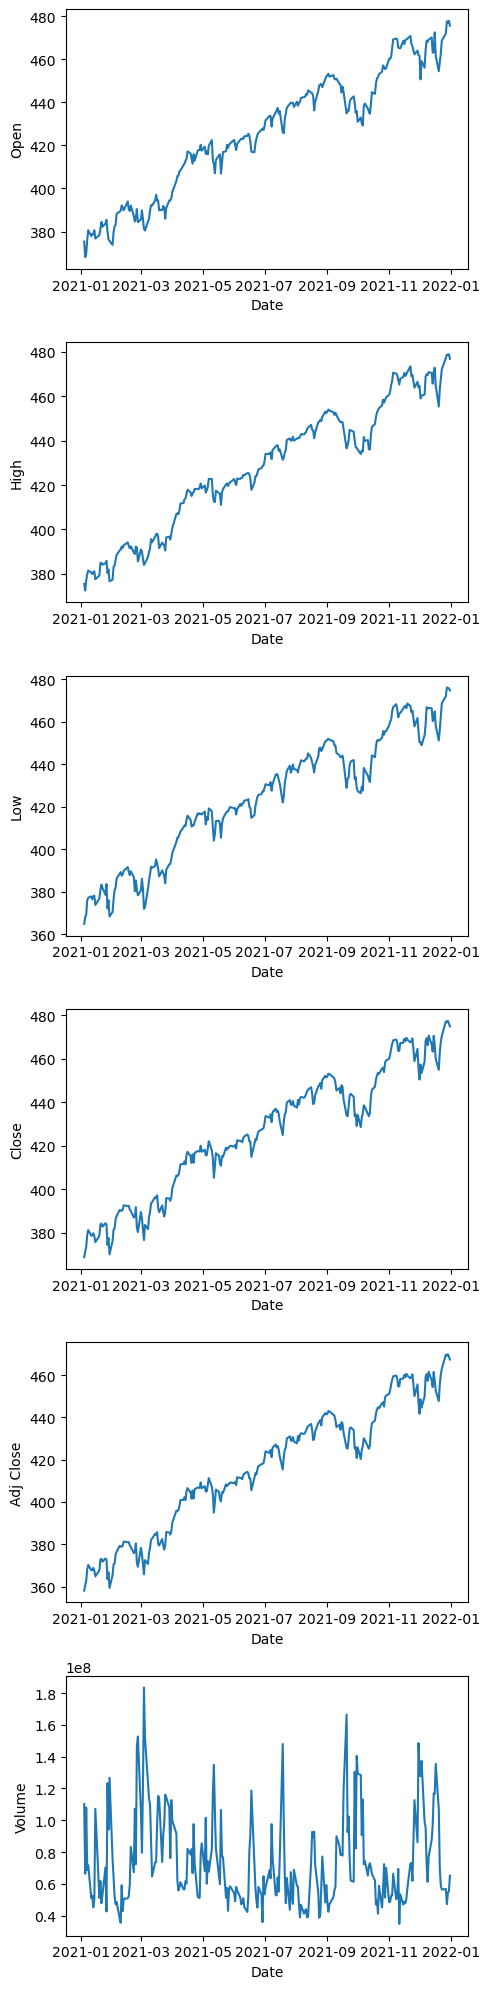

In [12]:
# indexing cont'd
data.loc[:, ["Open", "Close"]]

fig, axes = plt.subplots(len(data.columns.values), 1, figsize=(5, 20))

for idx, column in enumerate(data.columns.values):
    axes[idx].plot(data.loc[:,column])
    axes[idx].set(ylabel=column, xlabel="Date")
    plt.tight_layout()

<AxesSubplot:xlabel='Date'>

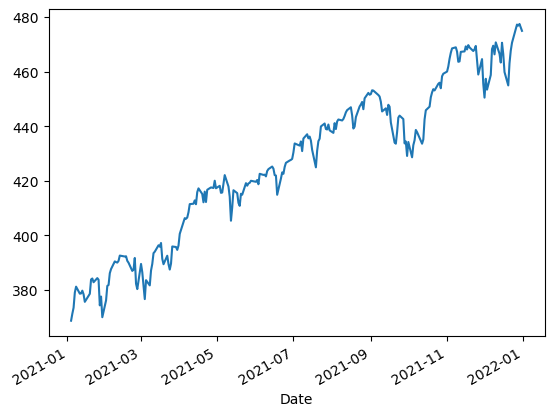

In [13]:
data.Close.values[0:100:10] #Every 10 datapoints of the first 100 datapoints under "Close"
data.Close.plot()

[*********************100%***********************]  1 of 1 completed
Date
2021-01-04    368.790009
2021-01-05    371.329987
2021-01-06    373.549988
2021-01-07    379.100006
2021-01-08    381.260010
                 ...    
2021-12-27    477.260010
2021-12-28    476.869995
2021-12-29    477.480011
2021-12-30    476.160004
2021-12-31    474.959991
Name: Close, Length: 252, dtype: float64
Type in fast rolling average days5
Type in slow rolling average days45


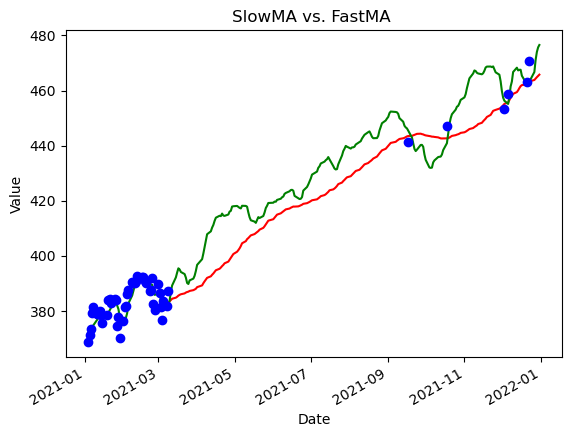

In [98]:
#Practice assignment
data = yf.download("SPY", start="2021-01-01", end="2022-01-01")
#print(data)



closeData = data.iloc[:, 3]
#dateData = list(data.index)

print(closeData)
#print(dateData)

#listClose=[]
#listDate=[]
#for data1 in closeData:
#    listClose.append(data1)
#print(listClose)
#for data2 in dateData:
#    listDate.append(data2)
#print(listDate)
fast = int(input('Type in fast rolling average days'))
slow = int(input('Type in slow rolling average days'))


slowClose = closeData.rolling(slow).mean()
fastClose = closeData.rolling(fast).mean()

#print(slowClose)
#print(fastClose)


fig,ax = plt.subplots()
#(closeData).plot(xlabel="Date", ylabel="Value", color="black")
(slowClose).plot(xlabel="Date", ylabel="Value", color="red")
(fastClose).plot(title="SlowMA vs. FastMA ", xlabel="Date", ylabel="Value", color="green")


intersect = np.argwhere(np.diff(np.sign(fastClose - slowClose))).flatten()

#dateList = []

#print(data.index)

#for values in intersect:
#    dateList.append(data.index[values])
#print(dateList)
#for values in data.index[0]:
    #dateList.append(values)
#print(dateList)

plt.plot(title="SlowMA vs. FastMA ", xlabel="Date", ylabel="Value", color="green")
plt.plot(data.index[intersect], closeData[intersect], 'bo')

plt.show()


#axes.plot(closeData[0], closeData[1], "-", color="red")
#closeData

In [90]:
# getting the necessary data

data = yf.download(["^GSPC", "WMT"], start="2010-01-01")["Adj Close"] # downloads and stores the 'adjusted close' data for the s&p500 and walmart
data.columns = ["spy", "wmt"] # renames the columns in the dataframe

data

[*********************100%***********************]  2 of 2 completed


,spy,wmt
Date,,
2010-01-04,40.329681,1132.989990
2010-01-05,39.928104,1136.520020
2010-01-06,39.838863,1137.140015
2010-01-07,39.861172,1141.689941
2010-01-08,39.660378,1144.979980
...,...,...
2023-02-10,143.720001,4090.459961
2023-02-13,145.910004,4137.290039
2023-02-14,145.490005,4136.129883


In [16]:
returns_1 = data.pct_change().dropna(axis=0) # calculates the daily percent change (shown below), then removes all rows with NaN values
# 'axis = 0' refers to rows, while 'axis = 1' refers to columns
returns_1

,spy,wmt
Date,,
2010-01-05,-0.009958,0.003116
2010-01-06,-0.002235,0.000546
2010-01-07,0.000560,0.004001
2010-01-08,-0.005037,0.002882
2010-01-11,0.016501,0.001747
...,...,...
2023-02-10,0.015545,0.002195
2023-02-13,0.015238,0.011449
2023-02-14,-0.002878,-0.000280


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date', ylabel='Returns'>

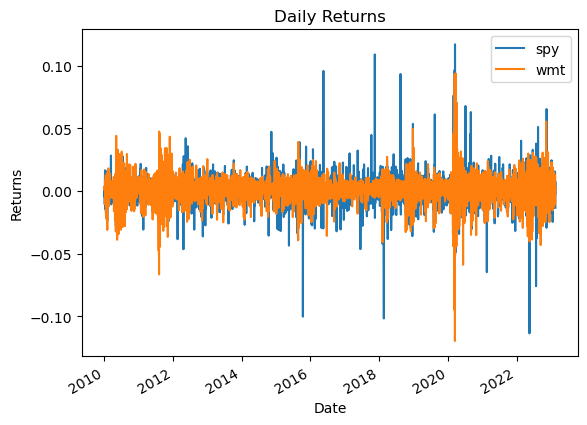

In [17]:
returns_1.plot(title="Daily Returns", ylabel="Returns")

In [18]:
(data.iloc[1, 0] / data.iloc[0, 0]) - 1

-0.009957639783794936

In [19]:
returns_2 = (data/data.shift(1)).dropna(axis=0) # does something similar to the cell above, however it does not subtract 1

returns_2

,spy,wmt
Date,,
2010-01-05,0.990042,1.003116
2010-01-06,0.997765,1.000546
2010-01-07,1.000560,1.004001
2010-01-08,0.994963,1.002882
2010-01-11,1.016501,1.001747
...,...,...
2023-02-10,1.015545,1.002195
2023-02-13,1.015238,1.011449
2023-02-14,0.997122,0.999720


In [20]:
# log_returns

log_rets = np.log((data/data.shift(1)).dropna(axis=0)) # calculates the log returns

log_rets

,spy,wmt
Date,,
2010-01-05,-0.010008,0.003111
2010-01-06,-0.002237,0.000545
2010-01-07,0.000560,0.003993
2010-01-08,-0.005050,0.002878
2010-01-11,0.016366,0.001745
...,...,...
2023-02-10,0.015426,0.002193
2023-02-13,0.015123,0.011384
2023-02-14,-0.002883,-0.000280


In [21]:
# cumulative returns

cum_returns_1 = (1+returns_1).cumprod() - 1
cum_returns_2 = returns_2.cumprod() - 1

In [22]:
(data.iloc[-1, :] - data.iloc[0, :])/data.iloc[0, :]

spy    2.585572
wmt    2.624498
dtype: float64

In [23]:
cum_returns_1.iloc[-1, :]

spy    2.585572
wmt    2.624498
Name: 2023-02-16 00:00:00, dtype: float64

In [24]:
cum_returns_2.iloc[-1, :]

spy    2.585572
wmt    2.624498
Name: 2023-02-16 00:00:00, dtype: float64

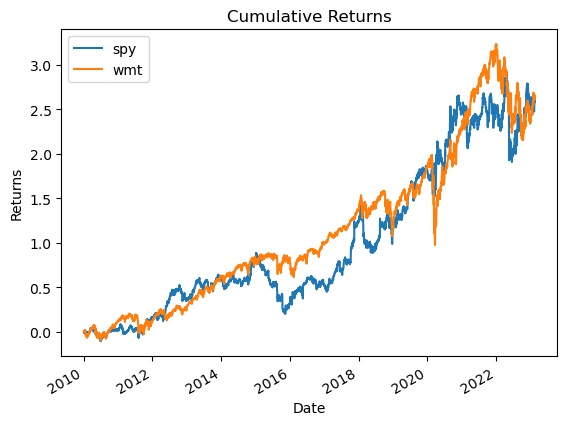

In [25]:
(cum_returns_1).plot(title="Cumulative Returns", ylabel="Returns")
plt.show()

In [26]:
X = returns_1.spy
y = returns_1.wmt
X_const = sm.add_constant(X)# an intercept is not added by default, so it is up to the user to add it

model = sm.OLS(y, X_const)
reg = model.fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wmt   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     900.2
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          4.27e-175
Time:                        15:24:34   Log-Likelihood:                 10546.
No. Observations:                3303   AIC:                        -2.109e+04
Df Residuals:                    3301   BIC:                        -2.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.490      0.136   -8.14e-05       0.001
spy            0.4222      0.014     30.003      0.000       0.395       0.450
==============================================================================
Omnibus:                      636.053   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12171.409
Skew:                          -0.372   Prob(JB):                         0.00
Kurtosis:                      12.375   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(f"The beta of the stock is {round(reg.params[1], 2)}")

The beta of the stock is 0.42


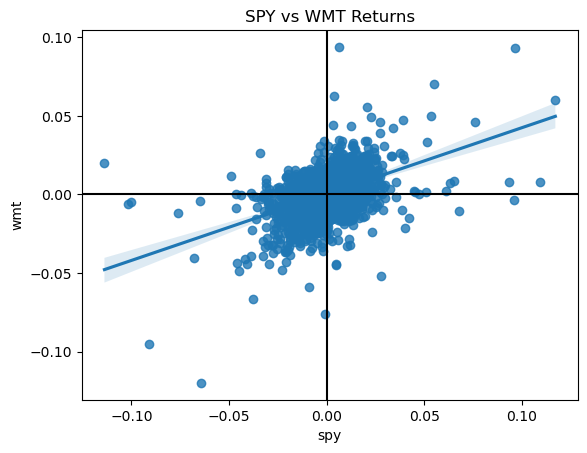

In [28]:
import seaborn as sns # another visualization library
sns.regplot(x="spy", y="wmt", data=returns_1) # ci=None to turn off confidence interval
plt.title("SPY vs WMT Returns")
plt.axvline(0, color = "black")
plt.axhline(0, color = "black")
plt.show()

